# Network Analysis

## Grupo

- María Cruz 		2220279
- Pedro Guedes 	1812061
- Rodrigo Motta 	1811524
- Tatiana Reimer 	1720679

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations as comb
from networkx.algorithms import bipartite

In [3]:
name_basics = "name.basics.tsv"
nb_columns = ['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession']

nb_df = pd.read_csv(name_basics,sep='\t',header=0,usecols=nb_columns)
nb_df.dropna()
nb_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor"


In [4]:
title_akas = "title.akas.tsv"
ta_columns = ['titleId', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle']
convert_dict = {'titleId': str, 'ordering': int, 'title': str, 
                'region': str, 'language': str, 'types': str, 'attributes': str, 'isOriginalTitle': str}

ta_df = pd.read_csv(title_akas,sep='\t',header=0,usecols=ta_columns,dtype=convert_dict)
ta_df = ta_df[ta_df['isOriginalTitle'] == '1']
ta_df.rename(columns={'titleId':'tconst'}, inplace=True)
ta_df.dropna()
ta_df.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
21,tt0000003,6,Pauvre Pierrot,\N,\N,original,\N,1
25,tt0000004,1,Un bon bock,\N,\N,original,\N,1
34,tt0000005,11,Blacksmith Scene,\N,\N,original,\N,1


In [5]:
title_basics = "title.basics.tsv"
tb_columns = ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear', 'isAdult', 'endYear', 'runtimeMinutes', 'genres']
convert_dict = {'tconst': str, 'titleType': str, 'primaryTitle': str, 'originalTitle': str, 
                'startYear': str, 'isAdult': object,'endYear': str, 'runtimeMinutes': str, 'genres': object}

tb_df = pd.read_csv(title_basics,sep='\t',header=0,usecols=tb_columns,dtype=convert_dict)
tb_df.dropna()
tb_df = tb_df[~tb_df['genres'].str.contains('N', na=False)]
tb_df = tb_df[~tb_df['startYear'].str.contains("N", na=False)]
tb_df = tb_df[~tb_df['isAdult'].str.contains("N", na=False)]
tb_df = tb_df[tb_df['isAdult'].astype(int) == 0]
tb_df = tb_df[tb_df['titleType'] == "movie"]
tb_df = tb_df[tb_df['startYear'].astype(int) >= 2000]
tb_df = (tb_df.drop(columns='genres').join(tb_df['genres'].str.get_dummies(sep=',')))
tb_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,Action,Adult,...,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,1,0,...,0,0,0,0,0,0,0,0,0,0
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,133,0,0,...,0,0,0,0,0,0,0,0,0,0
34792,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,0,0,...,0,0,1,0,0,0,0,0,0,0
61094,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,\N,70,0,0,...,0,0,0,0,0,0,0,0,0,0
66309,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006,\N,47,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
title_principals = "title.principals.tsv"
tp_columns = ['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']

tp_df = pd.read_csv(title_principals,sep='\t',header=0,usecols=tp_columns)
tp_df = tp_df[tp_df['category'] == "actor"]
tp_df.drop('ordering', axis=1, inplace=True) 
tp_df.drop('category', axis=1, inplace=True) 
tp_df.drop('job', axis=1, inplace=True) 
tp_df.drop('characters', axis=1, inplace=True) 
tp_df.dropna()
tp_df.head()

,tconst,nconst
11,tt0000005,nm0443482
12,tt0000005,nm0653042
16,tt0000007,nm0179163
17,tt0000007,nm0183947
21,tt0000008,nm0653028


In [6]:
title_ratings = "title.ratings.tsv"
tr_columns = ['tconst', 'averageRating', 'numVotes']

tr_df = pd.read_csv(title_ratings,sep='\t',header=0,usecols=tr_columns)
tr_df.dropna()
tr_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1914
1,tt0000002,5.8,259
2,tt0000003,6.5,1720
3,tt0000004,5.6,172
4,tt0000005,6.2,2537


### Merge

#### title.akas + title.basics + title.ratings

In [7]:
'''
ta_tb_df = pd.merge(ta_df, tb_df, how='inner',on='tconst')
movies = pd.merge(ta_tb_df, tr_df, how='inner',on='tconst')
movies.head()
'''

"\nta_tb_df = pd.merge(ta_df, tb_df, how='inner',on='tconst')\nmovies = pd.merge(ta_tb_df, tr_df, how='inner',on='tconst')\nmovies.head()\n"

In [8]:
'''
actors = nb_df
actors.head()
'''

'\nactors = nb_df\nactors.head()\n'

In [18]:
bipartite_df = pd.merge(tp_df, tb_df, how='inner',on='tconst')
bipartite_df = bipartite_df.drop(bipartite_df.columns[2:],axis = 1)
bipartite_df.head()

,tconst,nconst
0,tt0011801,nm0459029
1,tt0011801,nm0681726
2,tt0011801,nm0726256
3,tt0011801,nm0776458
4,tt0011801,nm0666006


In [19]:
G = nx.Graph()
G.add_nodes_from(bipartite_df['tconst'], bipartite=0)
G.add_nodes_from(bipartite_df['nconst'], bipartite=1)

In [20]:
G.add_edges_from(zip(bipartite_df['tconst'], bipartite_df['nconst']))

In [21]:
nx.is_bipartite(G)

True

In [22]:
G.number_of_nodes()

453788

In [23]:
nx.is_connected(G)

False

In [24]:
left_or_top = bipartite_df['tconst']
pos = nx.bipartite_layout(G, left_or_top)

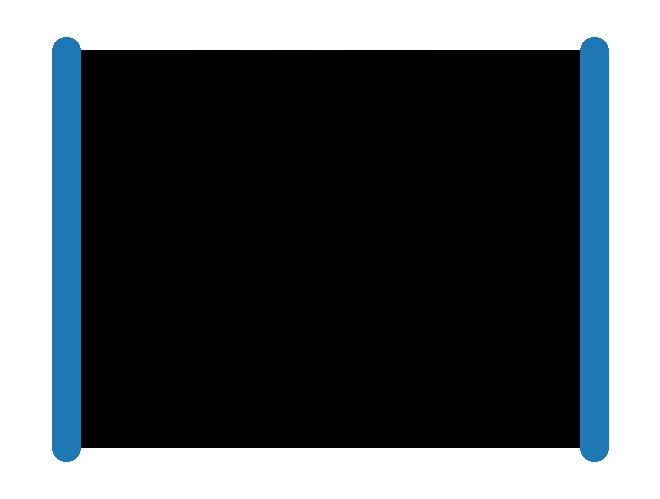

In [25]:
nx.draw(G, pos=pos, node_size=100, alpha=1, linewidths=10)
plt.show()

In [26]:
actors_nodes = set(n for n,d in G.nodes(data=True) if d['bipartite']==1)
movies_nodes = set(G) - actors_nodes

In [27]:
A = bipartite.projected_graph(G, movies_nodes)

In [30]:
A.number_of_nodes()

186089